In [127]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
%matplotlib inline

In [129]:
#in figure b, four jobs are launched in parallel. 
#Number of nodes per job is changing
#32 cpu VMs 

In [136]:
vms_per_job=[1,2,4,8]

In [137]:
fig_b_path = "./experiment_data/FigureB/confinement/confinement_c_parellel_32_{vms_per_job}_4.dat".format(vms_per_job=vms_per_job)

In [160]:
confin_times = [8621, 6723, 7186, 7054]
confin_fails=[1, 0, 3, 4]
shapes_times = [7805, 6723, 4658, 4702]
shapes_fails=[1, 0, 1, 3]

In [161]:
def plot_vm_scaling(vms_per_job, jobs, times):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots()
    fig.set_size_inches(8,4)
    ax.plot(vms_per_job, np.array(times[0])/3600.0, marker='*',color='r', label=jobs[0])
    ax.plot(vms_per_job, np.array(times[1])/3060.0, marker='o',color='k', label=jobs[1])
    total_cpus=[32*4*i for i in vms_per_job]

    ax.set_xticks(vms_per_job)
    ax.set_xticklabels(total_cpus)
    ax.set_xlim((0.5, 9))
    ax.set_ylim((0))
    ax.legend(loc='best')
    ax.set_xlabel("Cluster size (# CPUs)")
    ax.set_ylabel("Total time (hours)")
    plt.savefig("../graphs/vm-per-job-scaling.pdf",bbox_inches='tight')

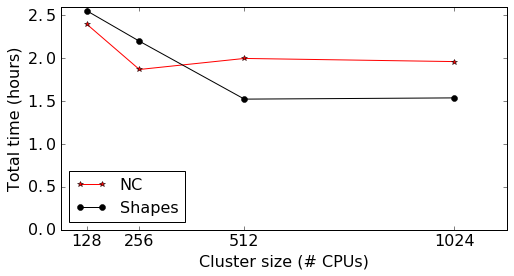

In [162]:
plot_vm_scaling(vms_per_job, ['NC','Shapes'], [confin_times, shapes_times])

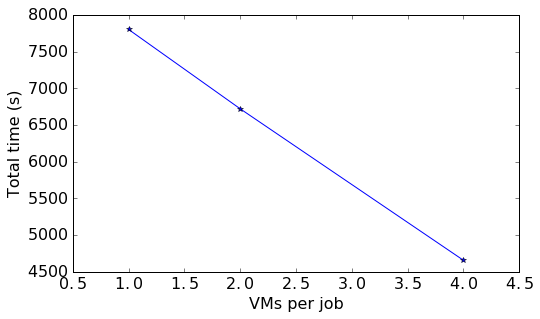

In [28]:
plot_vm_scaling(vms_per_job, shapes_times, shapes_fails)

In [39]:
#again, highcpu-32 used, but total cluster size is constant and equal to 32*8 CPUs = 256
par_jobs=[1,2,8]

In [40]:
fig_c_path = "./experiment_data/FigureC/confinement/confinement_c_parellel_32_{par_jobs}_4.dat".format(par_jobs=par_jobs)

In [42]:
#40 jobs completed in 32_1_8 ? 32 at 4214
confin_c_times=[4214, 6908, 20983]
confin_c_fails=[]
shapes_c_times=[3597, 5183, 18545]
shapes_c_fails=[]

In [123]:
def plot_par_scaling(par_jobs, jobs, times):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots()
    fig.set_size_inches(4,4)
    ax.plot(par_jobs, np.array(times[0])/3600.0, marker='*',color='r', label=jobs[0])
    ax.plot(par_jobs, np.array(times[1])/3060.0, marker='o',color='k', label=jobs[1])

    ax.set_ylim((0))
    ax.set_xlabel("CPUs per Job \n (Total #CPUs=256)")
    ax.set_ylabel("Total time (hours)")
    ax.legend(loc='best')
    ax.set_xlim((0.5,8.5))
    ax.set_xticks(par_jobs)
    ax.set_xticklabels([32*i for i in par_jobs])
    plt.savefig("../graphs/par-scaling.pdf", bbox_inches='tight')

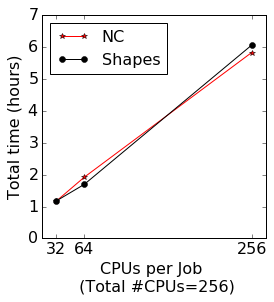

In [126]:
plot_par_scaling(np.array(par_jobs), ['NC','Shapes'], [confin_c_times, shapes_c_times])

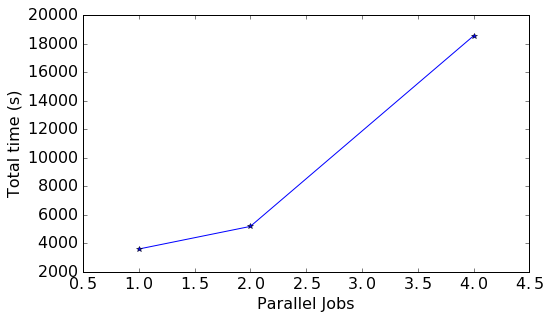

In [45]:
plot_par_scaling(par_jobs, shapes_c_times, confin_c_fails)

In [ ]:
def plot_vm_scaling(vms_per_job, times, fails):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots()
    fig.set_size_inches(8,4.6)
    ax.plot(vms_per_job, times, marker='*')
    ax.set_xlim((0.5,4.5))
    ax.set_xlabel("VMs per job")
    ax.set_ylabel("Total time (s)")

In [163]:
confin_fails_data=[(0,6655),(2,7024),(3, 7186), (6, 7951), (7,7795), (8, 8560), (9,9842)]

In [167]:
num_fails, runtimes = zip(*confin_fails_data)

In [194]:
def plot_fails(fails_data):
    num_fails, runtimes = zip(*fails_data)
    runtimes=np.array(runtimes)/3600.0
    #runtimes= np.array(r)
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots()
    fig.set_size_inches(8,5)
    ax.scatter(num_fails, runtimes, marker='o',color='k')
    ax.set_xlabel("Number of VM preemptions (Cluster Size=4)")
    ax.set_ylabel("Bag of Jobs Running Time (Hours)")
    ax.set_xlim((-0.5))
    ax.set_ylim((0))
    plt.savefig("../graphs/confin-fails-vs-time.pdf",bbox_inches='tight')

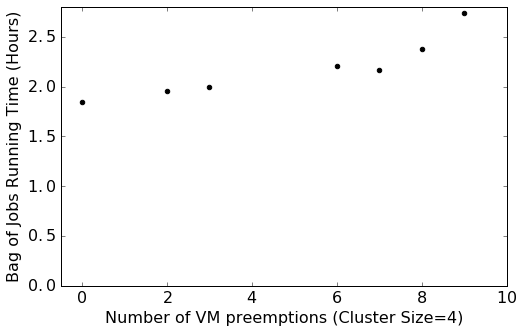

In [195]:
plot_fails(confin_fails_data)

In [196]:
21925/60.0

365.4166666666667

In [197]:
16190/60.0

269.8333333333333

In [199]:
5314/60.0

88.56666666666666

In [201]:
#/home/prateeks/scispot/data/experiment_data/FigureB/confinement/32_1_4
#cat confinement_c_parellel_32_1_4.dat | grep "Job running time" | awk '{printf("%s,",$NF) }'

In [202]:
confin_job_times_all=[874.752118,947.05861,954.975862,963.20496,876.087263,955.455944,955.879468,859.834913,955.887315,955.95729,956.625677,859.845442,956.930339,957.079793,955.948494,876.725272,955.652999,955.867715,956.705144,875.497441,939.636707,955.763832,939.962587,875.968836,956.753729,956.798093,955.667413,891.703246,955.717382,955.661463,956.745726,891.85922,955.954916]

In [204]:
shapes_job_times_all=[786.240546,810.293118,810.137086,807.437622,796.106445,790.91642,812.029826,796.227921,795.052762,795.210337,795.323622,795.498612,796.46262,796.29557,796.505656,796.434387,796.114245,796.014058,796.340615,796.209578,795.336227,795.585638,795.628447,795.334607,796.574618,796.17202,796.214043,796.18015,796.359743,795.38825,795.361092,796.337653,795.240417,795.949312,796.620197,795.358696]

{'boxes': [<matplotlib.lines.Line2D at 0x7ff70d64e090>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff70d94b610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff70d316c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff70d6cafd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff70d64e790>,
  <matplotlib.lines.Line2D at 0x7ff70d702e90>]}

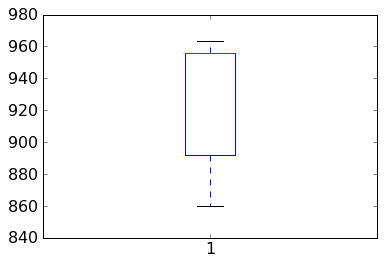

In [207]:
plt.boxplot(confin_job_times_all)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff70d663e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff70d580e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff70d499c90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff70d3c8c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff70d663a50>,
  <matplotlib.lines.Line2D at 0x7ff70d6630d0>]}

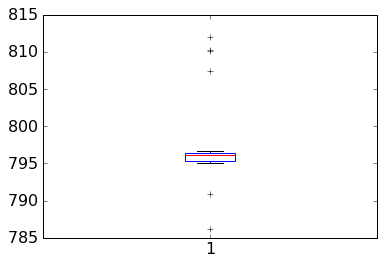

In [208]:
plt.boxplot(shapes_job_times_all)